# Global Emission Patterns, Using Unsupervised Learning 

## Introduction :  

    Understanding how countries differ in greenhouse gas emissions is essential for global climate change and to develop policies to reduce the effect and level of global warming on our environment. During recent times there is a lot of data collected from different sources and sensors that help us better understand the patterns and clusters across different nations using advanced unsupervised learning techniques. 

    This report examines greenhouse gases and CO2 emissions across countries from the year 2000 to 2022 using a cleaned and filtered dataset from the original CO2 and greenhouse gas emission dataset [1] from our world in data [2]. Each row in the dataset represents the emission profile of the country in a particular year which results in 2,250 observations. The column represents the variables grouped into five categories: demographic indicators (eg. Country, GDP in USD, and Year),  sources of CO2 emissions (eg. total CO2, from oil, gas, coal, cement and flaring all measured in tonnes), emission intensity (eg. CO2 per capita(tonnes/person), and CO2 per gdp (tonnes/thousand usd)), global emission share (eg. Countries share of global CO2), and greenhouse gases (eg. Methane per capita, Nitrous oxide per capita in tonnes/person) , total greenhouse emissions with and without land use change (i.e urbanization , deforestation and afforestation) and temperature change from CO2 (measured in celsius) 

    We apply Principal Component Analysis, Singular Value Decomposition, KMeans Clustering, and Hierarchical Clustering to identify patterns to discover how countries group based on their emission profile. Our Goal is to find Clusters to reveal how emission profiles are grouped in these past two decades to better understand our global climate goals and policies. 

## Theoretical Background: 


    Unsupervised Learning in artificial intelligence is a type of machine learning that learns from data without human supervision [3]. Unlike supervised learning, unsupervised machine learning models are given unlabeled data and allowed to discover patterns and insights without explicit guidance or instruction [3]. Unsupervised learning is used to explore the data and understand its structure to gain meaningful insights. 

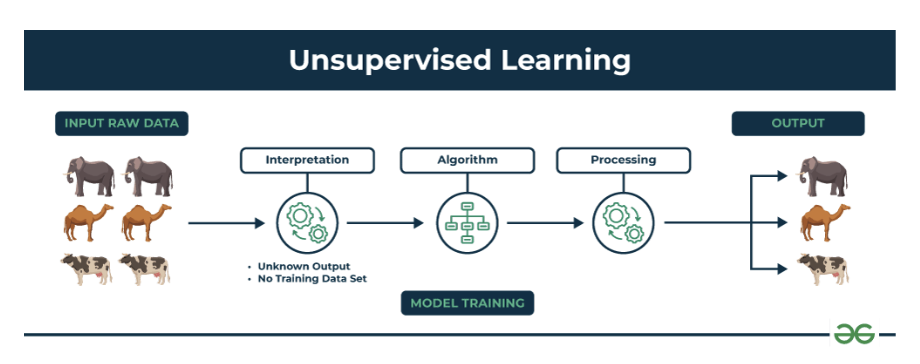

In [9]:
display(Image.open("unsupervised.png"))

                                            Figure 1. Working of Unsupervised learning [4]


There are three types of Unsupervised learning algorithms

    1. Clustering Algorithm
    2. Association Rule Learning 
    3. Dimensionality Reduction 

For this dataset we used Clustering Algorithms ( KMeans Clustering and Hierarchical Clustering ) along with Dimensionality reduction ( PCA and SVD).

Principal Component Analysis (PCA) : 

	PCA is a dimensionality reduction technique used in data analysis and machine learning. It helps to reduce the number of features in a dataset while keeping the most important features. Main goal of PCA is to reduce dimensionality  of high dimensional data while preserving  the data’s variance( information).  It changes your original features into new features and these features don’t overlap with each other.  PCA is commonly used for data preprocessing as it helps remove redundancy, improve computational efficiency and make the data easier to visualise and analyze when dealing with high dimensionality data [5]. 

The First Principal Component captures the direction of the greatest variance in the data, subsequent components capture the remaining variance each orthogonal to others. 

	Working of PCA: 
    
		It uses linear algebra to transform data into new features called principal components. 


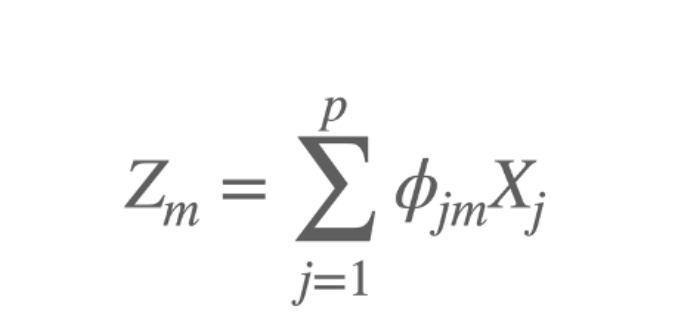

In [10]:
display(Image.open("2.png"))

                            Figure 2: Formula to calculate the mth principal component 


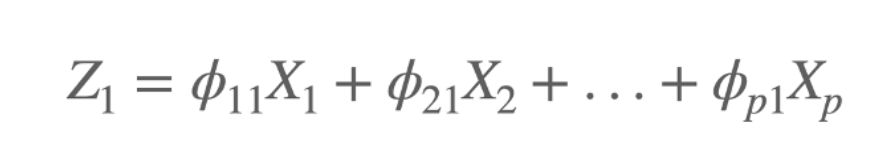

In [11]:
display(Image.open("3.png"))

                                        Figure 3: Formula to calculate the 1st principal component 


ɸ = new directions (p total ) along which the data lives

Zim = location of the ith data point in the transformed space 

    Though reducing dimensionality might lead to a slight loss in accuracy PCA makes up for it by giving simpler, faster and more interpretable representations. Tools like Scree plots of proportion of variance explained (PVE)  and cumulative variance explained help determine how many components to keep typically selecting the smallest number that can explain the most variance. 


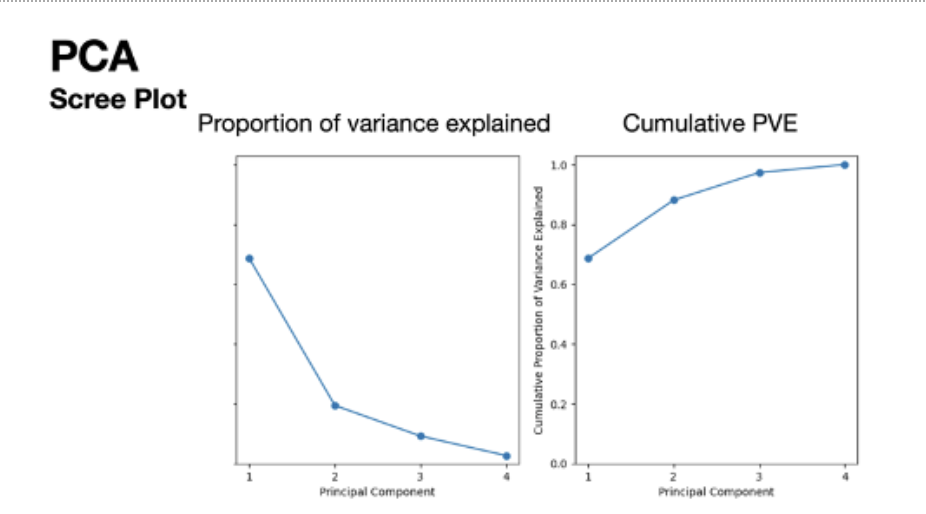

In [12]:
display(Image.open("4.png"))

                                            Figure 4: Scree plots of PVE and Cumulative PVE[11] 


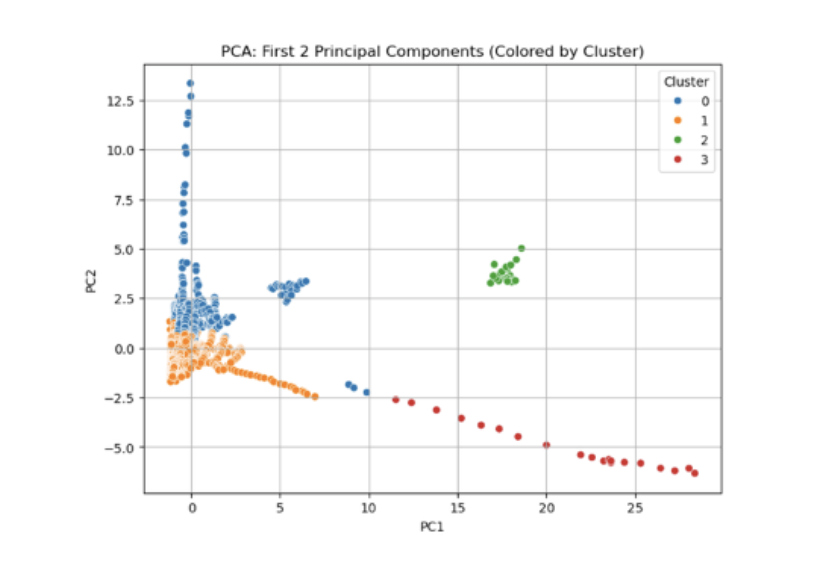

In [13]:
display(Image.open("5.png"))

                            Figure 5: A 2D scatter plot of the first 2 PC’s that shows cluster like structure.


Singular Value Decomposition (SVD): 

     SVD is a method used in linear algebra to decompose a matrix into three simpler matrices, making it easier to analyze and manipulate [6]. 



Working of SVD 

	Any data matrix X can be represented as 


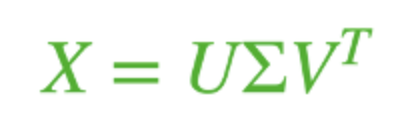

In [14]:
display(Image.open("6.png"))

Where: 

	U: Matrix of left singular vectors(like “PCA scores” where the datapoint lands) 
    Σ: Diagonal matrix of singular values ( how important each component is) 
	V^T: Matrix of right singular vectors ( like the directions or “PCA loadings”) 

How does SVD relate to PCA ?

    1. PCA = SVD when the data is mean-centred and scaled 
    2. Principal components (ɸ) = columns of V 
    3. Scores(Z) = U Σ


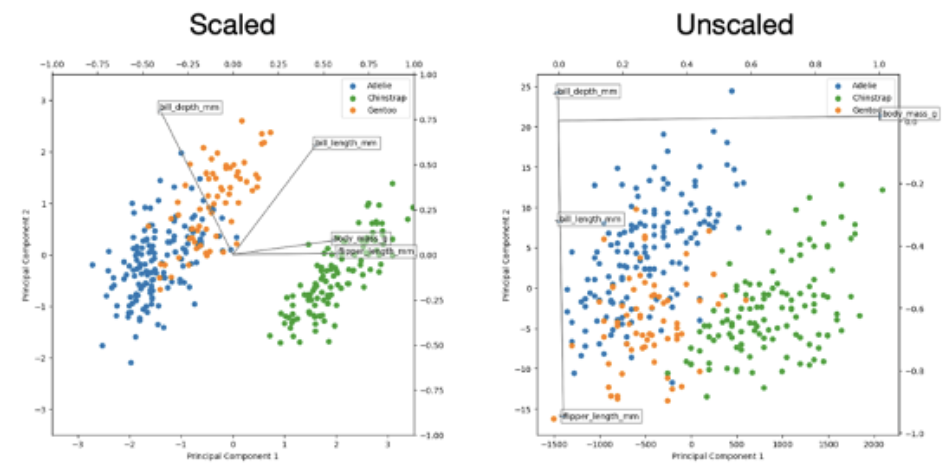

In [15]:
display(Image.open("7.png"))

                                            Figure 7: Scaled vs Unscaled Data [10]


Why SVD matters: 

	 Used in matrix completion, dimensionality reduction, image compression , recommendation systems, 

Matrix Completion: 

    The main goal for matrix completion is to fill in missing values using structure in data leverage PCA/SVD to approximate missing entries, start mean filling, and iteratively refine them. They are used in applications like recommender systems (eg. predicting the rating you didn’t give). 


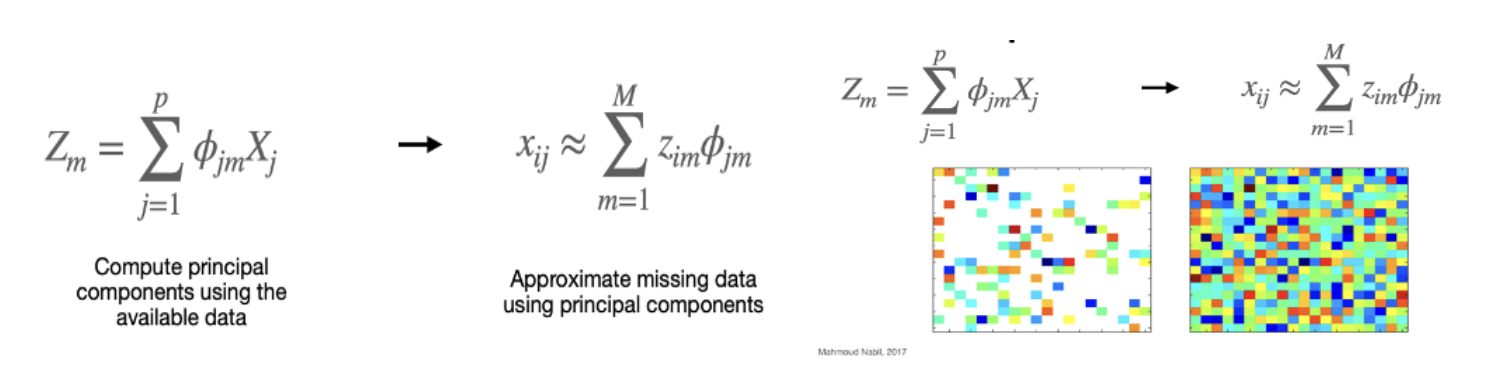

In [16]:
display(Image.open("8.png"))

                                            Figure 8: Working of Matrix Completion [10] 


K-Means Clustering
 
    KMeans Clustering is an unsupervised learning algorithm which groups unlabeled dataset into different clusters. It is used to organize data into groups based on their similarity [7].  It works by randomly assigning the data into clusters then calculate centroids of clusters and reassigning points that are closest to centroid and it is repeated until convergence.


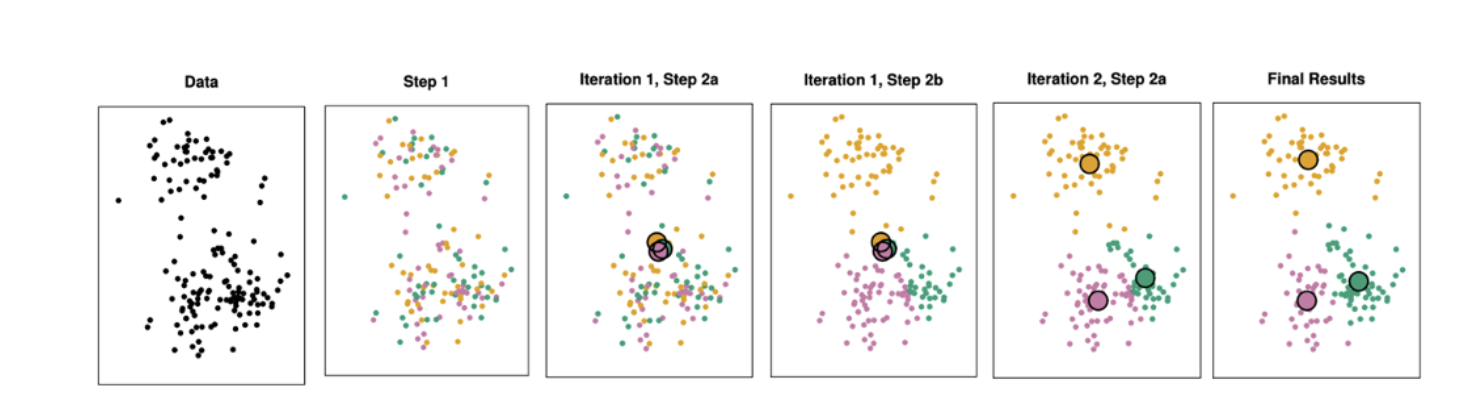

In [17]:
display(Image.open("9.png"))

                                                Figure 9: Working of KMeans Clustering [9] 


    KMeans has some limitations. It uses Euclidean distance so assume all spherical clusters. It doesn’t work well with outliers or non circular shape data, it only supports numerical data. It is sensitive to initialization and it’s better to run them multiple times and pick the best. It doesn’t have a built-in method to pick the best. We’ll need to use the elbow method using the silhouette score graph. 

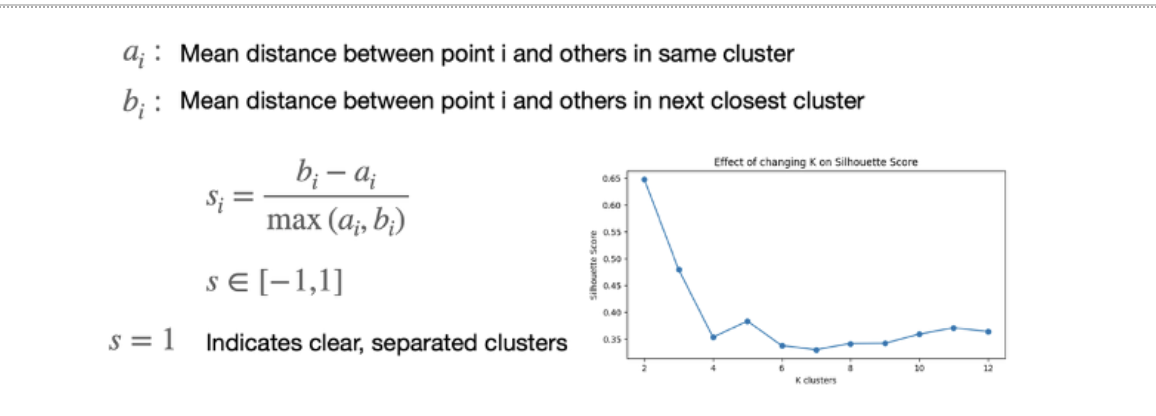

In [19]:
display(Image.open("10.png"))

                                            Figure 10: Calculation of Silhouette Scores[9]


Hierarchical Clustering: 

	It is used to group similar data points together based on their similarity creating a hierarchy or tree-like structure. The key idea is to begin with each data point as its own separate cluster and then progressively merge or split them based on their similarity. We follow an agglomerative (bottom up) approach [8]. 

    Dendrogram is like a family tree for clusters. It shows how individual data points or groups of data merge together. The bottom shows each data point as its own group and as we move up, similar groups are combined. Lower the merge point, the more similar the groups are [8]. 


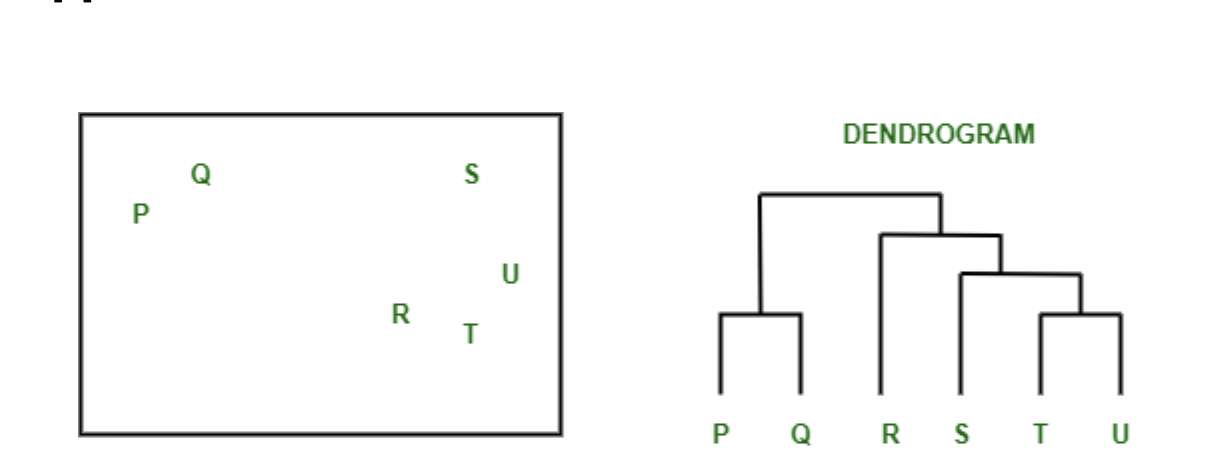

In [20]:
display(Image.open("11.png"))

                                                Figure 11: Working of Dendrogram [8] 


There are four types of linkage in hierarchical clustering 


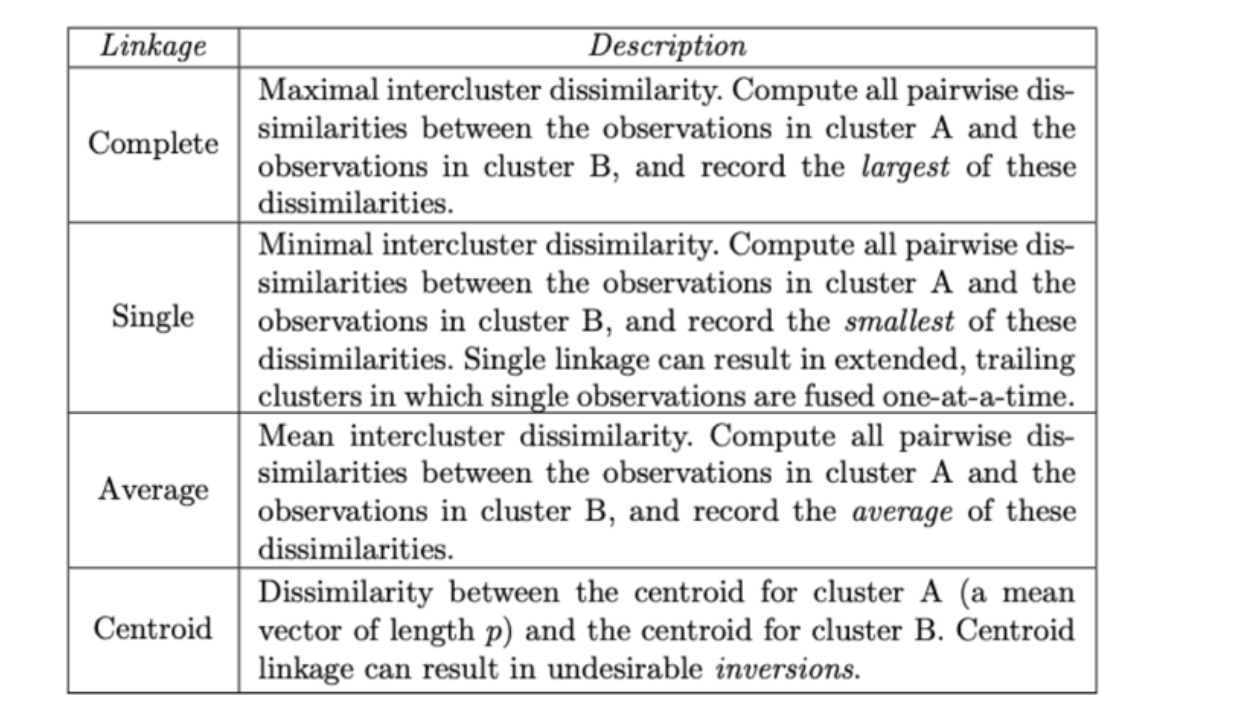

In [21]:
display(Image.open("12.png"))

                                        Figure 12: Types of linkage in hierarchical Clustering [9]


## Methodology



Data Cleaning:

			The initial dataset had 79 features, but only 17 features related to emissions, GDP, and climate impact were taken into consideration based on their importance and clear descriptions on the codebook of the data [1]. The data was filtered to include only (3-letter ISO codes) from 2000 to 2022, rows with missing values in selected columns were dropped. This resulted in a cleaner, focused dataset for analysis. 

Singular Value Decomposition: 

    The singular-value decomposition was applied to the fifteen standardized emission and economic variables, yielding three matrices labelled U, S, and V transpose. In this context, U has dimensions N x 15, where each column represents a left singular vector and assigns each country and year observation a coordinate along a hidden axis. The array S consists of fifteen singular values in descending order, and V transpose is a 15 x 15 matrix whose rows are right singular vectors, showing  how each original feature contributes to a given component. To verify how many components made sense for clustering, the reduced datasets were tested against different numbers of singular value dimensions. We used metrics like interia and silhouette scores to identify the number of features to retain. 

KMeans Clustering: 

    We used the first 8 columns of U found from SVD, each country and year observation was in an eight-dimensional coordinate for its projection onto the principal emission axes. K-means clustering was performed on these eight-dimensional points with the number of clusters k tried from two to ten. For each value of K, a within-cluster sum of squares (inertia) and silhouette scores was recorded. To find the best value of K in inertia we used the elbow method, for silhouette score we found which K achieved the  highest value. 

Hierarchical Clustering:  

    Similar to KMeans Clustering we used the first 8 columns of U found from SVD, each country and year observation was in an eight-dimensional coordinate for its projection onto the principal emission axes. Hierarchical Clustering was performed on these points using four different linkage methods Single, Complete, Average, and Ward. For each linkage method with the number of clusters set as 5 and the silhouette score was evaluated to pick the best linkage method. The best linkage method was used to assign cluster labels to the dataset. 


## Results

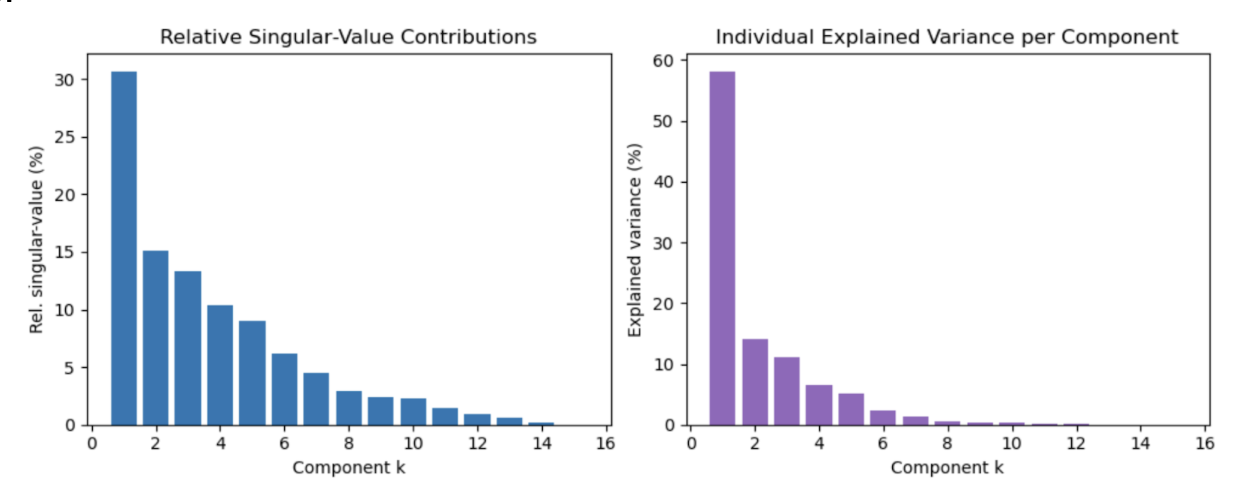

In [23]:
display(Image.open("13.png"))

                                        Figure 13: These plots show how important each component of SVD. 

    From the graph we can say that the  relative singular value for the first component reaches 30% and the explained variance of the first component captures 60% then it drops to ~15% for the next component. 



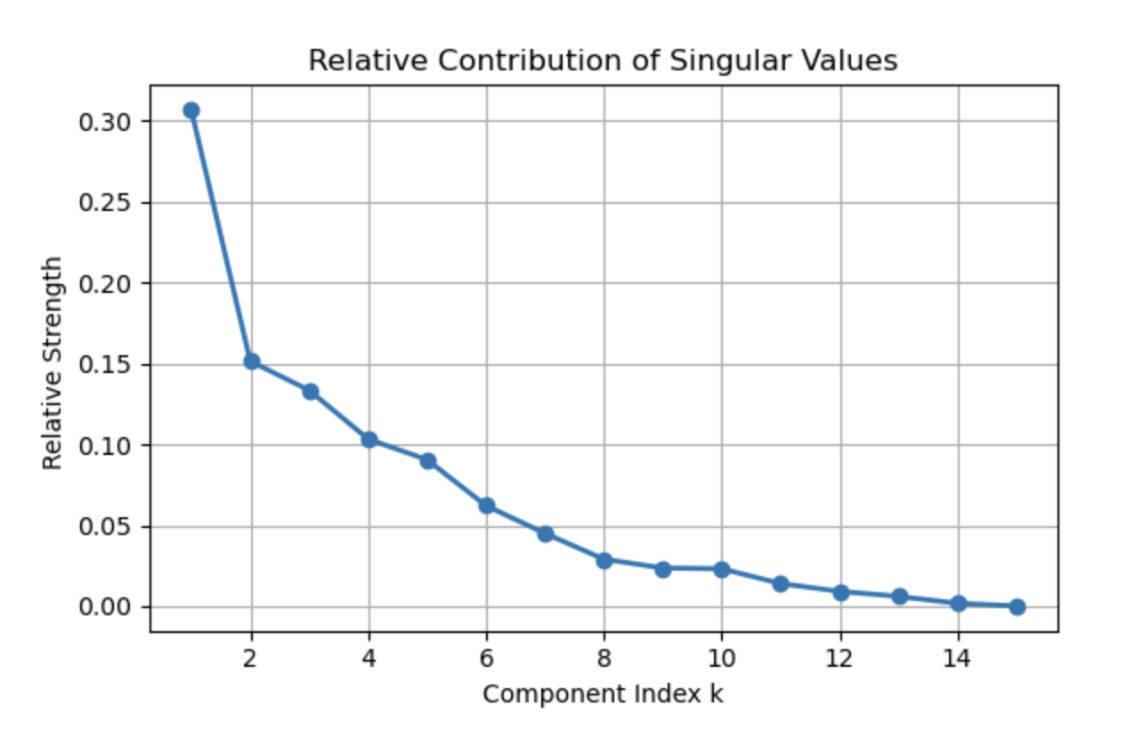

In [24]:
display(Image.open("14.png"))

                                            Figure 14: Relative Contribution vs Number of Components 

    This curve tells us the relative strength of each SVD component. The first component has 30%, the second component has 15%. Since the curve drops below 5% for the 6-7 component the first few components are responsible for the best relative strength. 


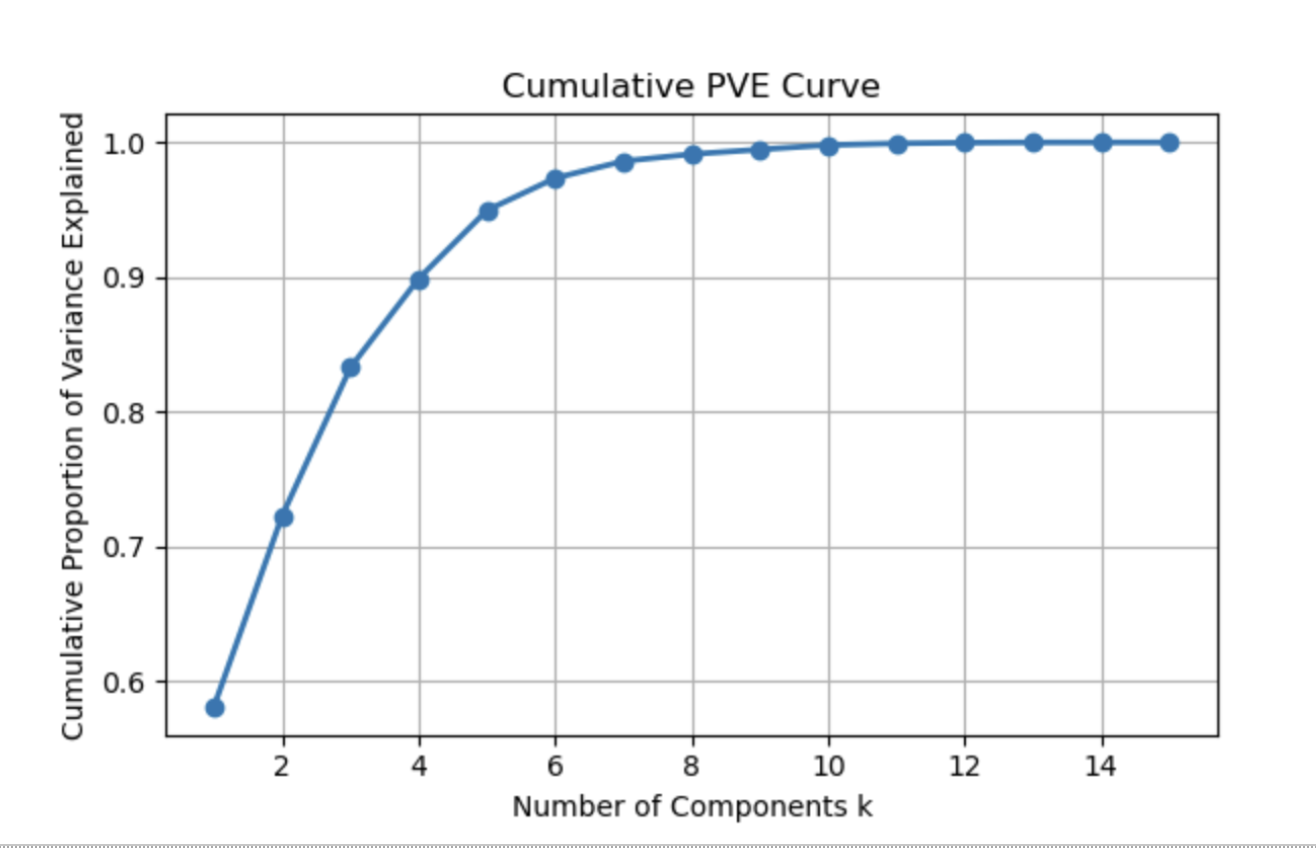

In [25]:
display(Image.open("15.png"))

                                            Figure 15: Cumulative PVE vs Number of Components

    This Curve shows how the cumulative variance increases as we add more components and saturates after reaching 8 components. So this tells us that the 5-8 components capture the most variance.  


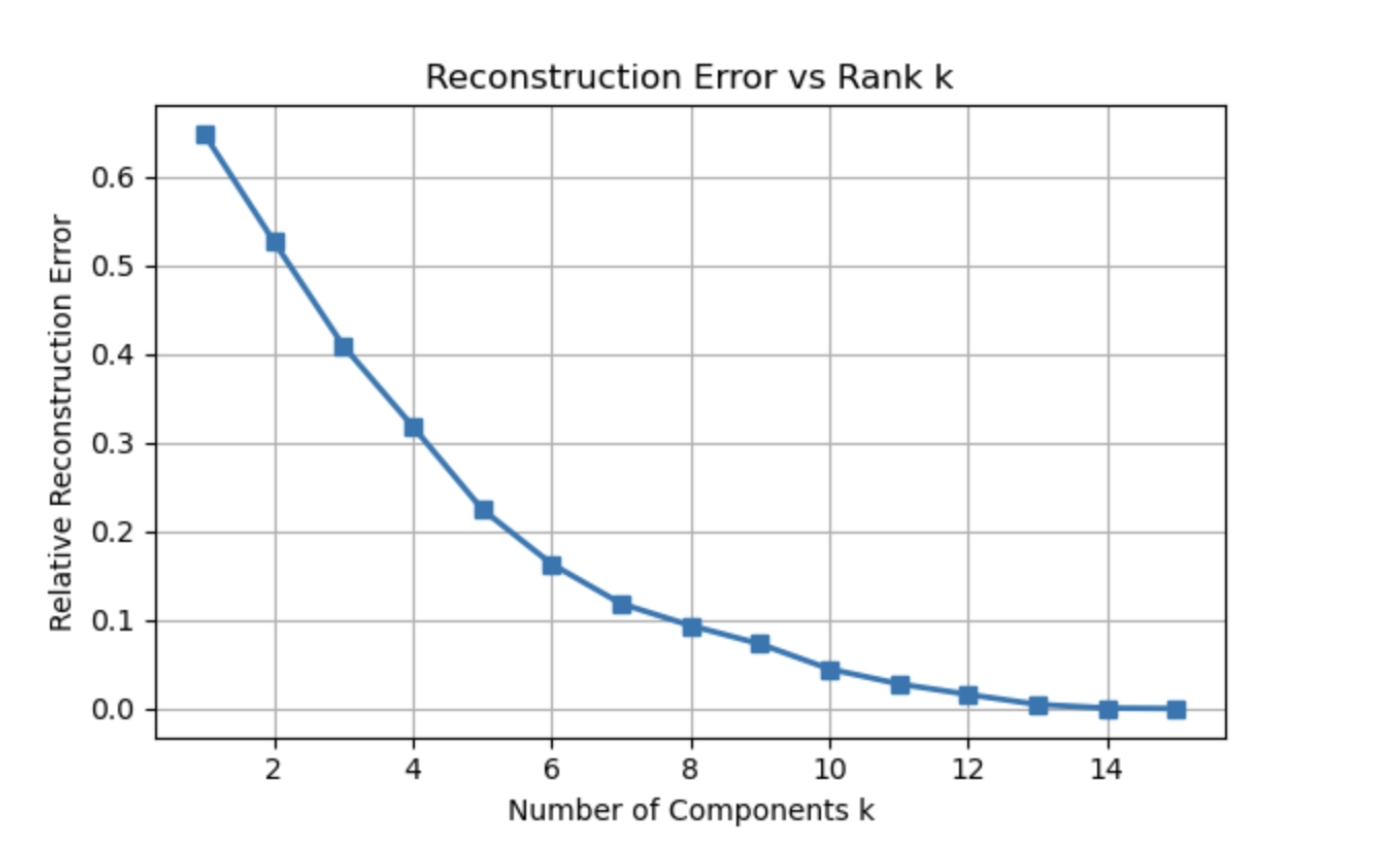

In [26]:
display(Image.open("16.png"))

                                            Figure 16: Reconstruction Error vs Rank K 
                            
    This plot shows us that the relative reconstruction error drops as we add more components. There is a steep descent in the first few components and then it flattens near 8-10 components. 


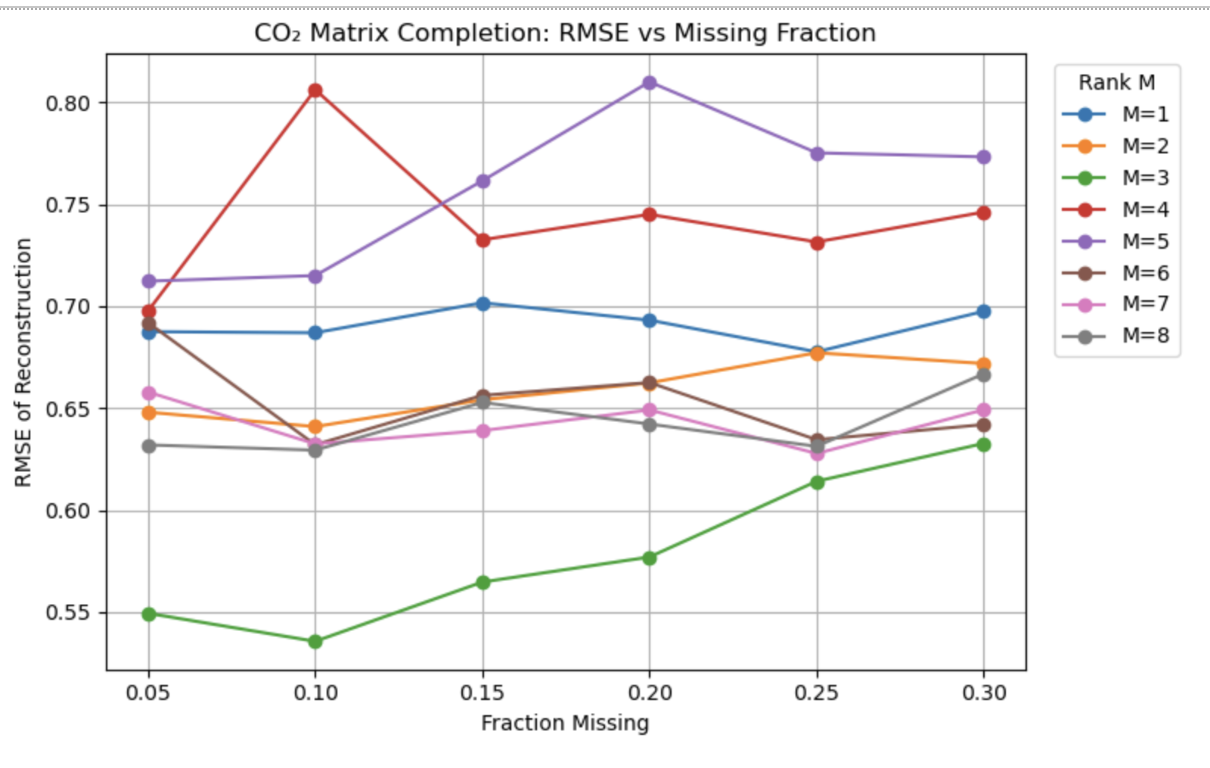

In [27]:
display(Image.open("17.png"))

                                                Figure 17: RMSE vs RANK(M)
                        
    This plot shows us how RMSE changes with missing data for different ranks (M). The best rank (M) would be 3 as its more stable and higher ranks doesn’t improve the RMSE. 


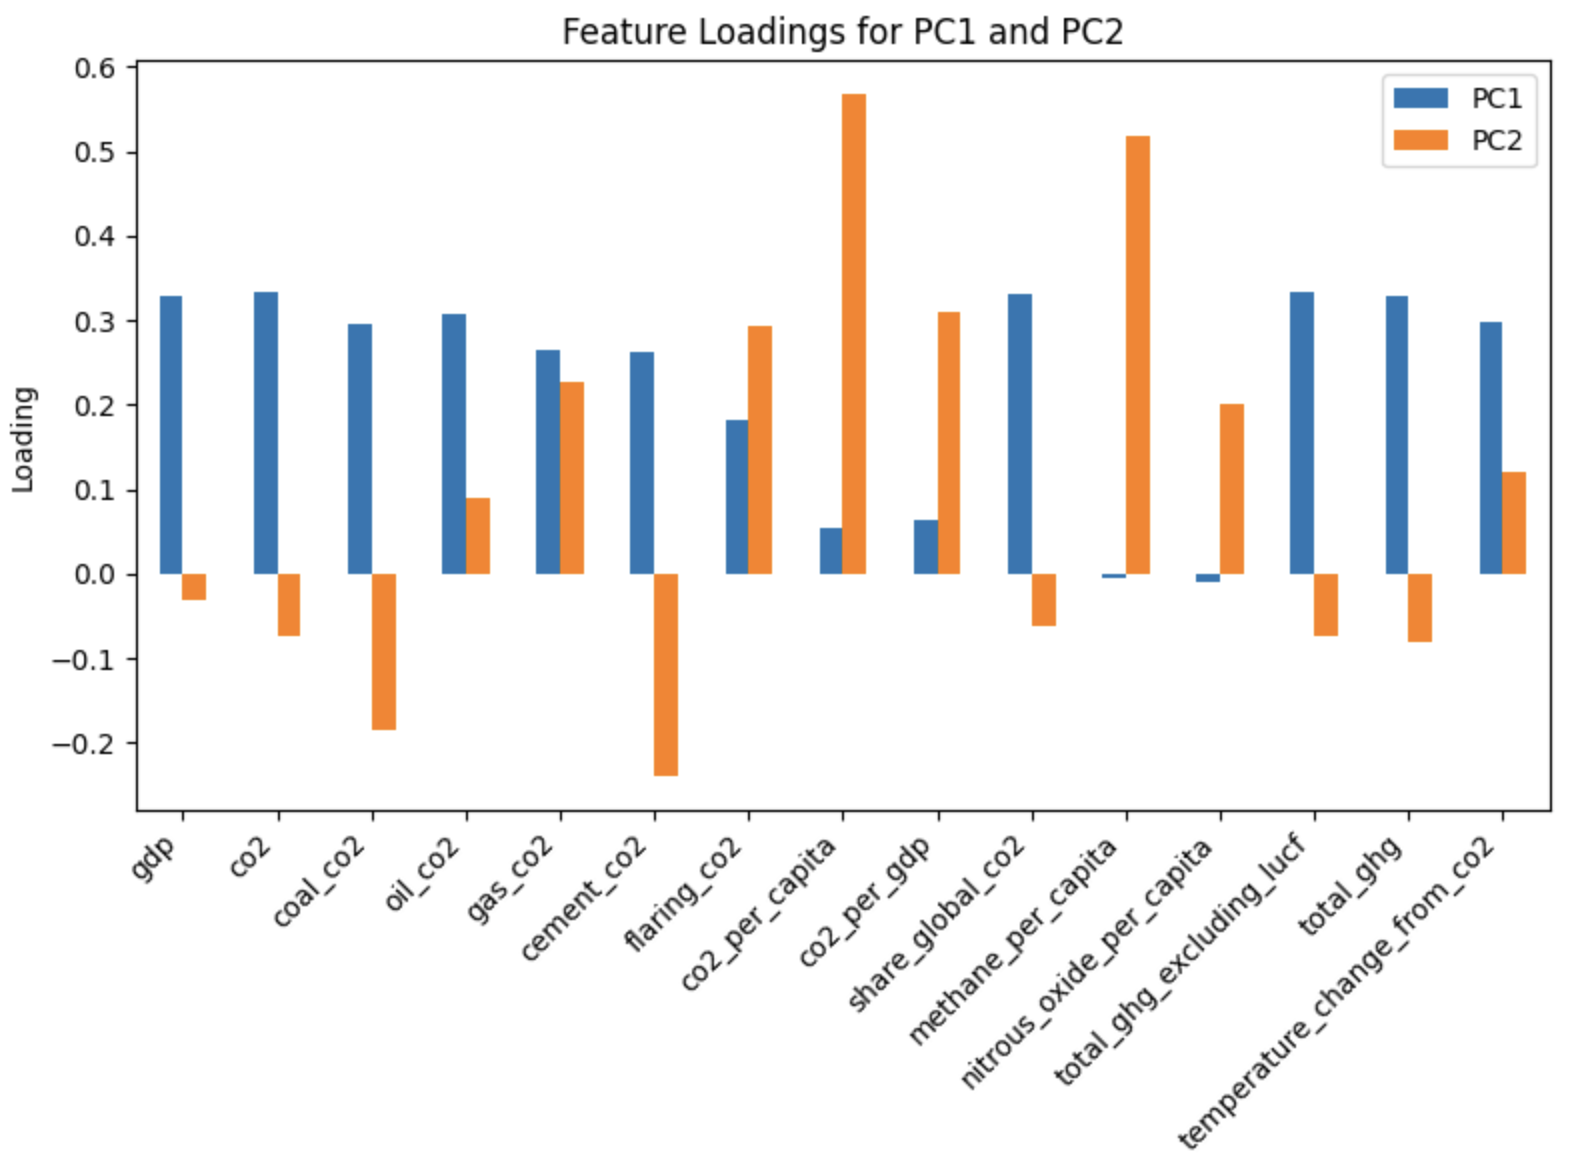

In [39]:
display(Image.open("28.png"))

                                            Figure 18: Feature Loadings of PC1 and PC2 

From the above plot we can see that Principal Component 1 is driven by features like CO2, CO2 emissions by Coal, Oil, Gas and GDP. While Principal Component 2 is driven by features like Per capita values and 

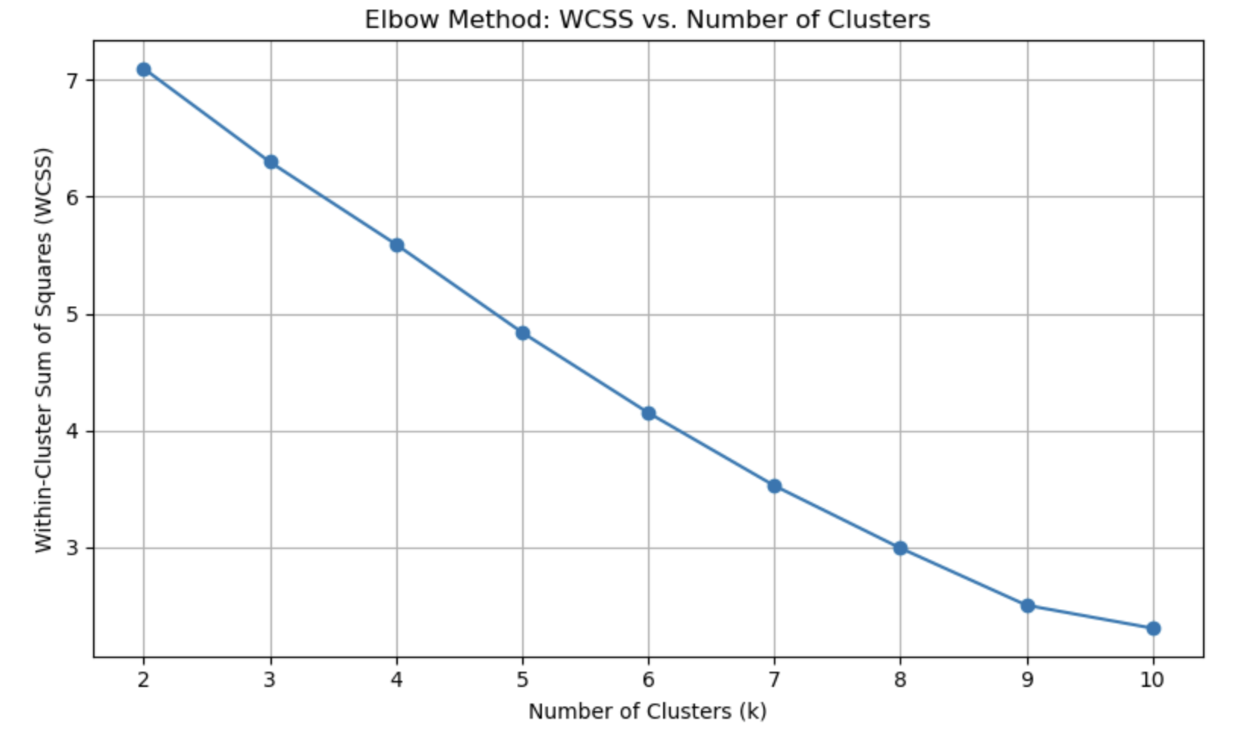

In [28]:
display(Image.open("18.png"))

                                                        Figure 19: WCSS vs Number of Clusters
                    
    This curve shows us how the WCSS changes with the number of clusters using the elbow method. We identify 5 as the best number of clusters. 


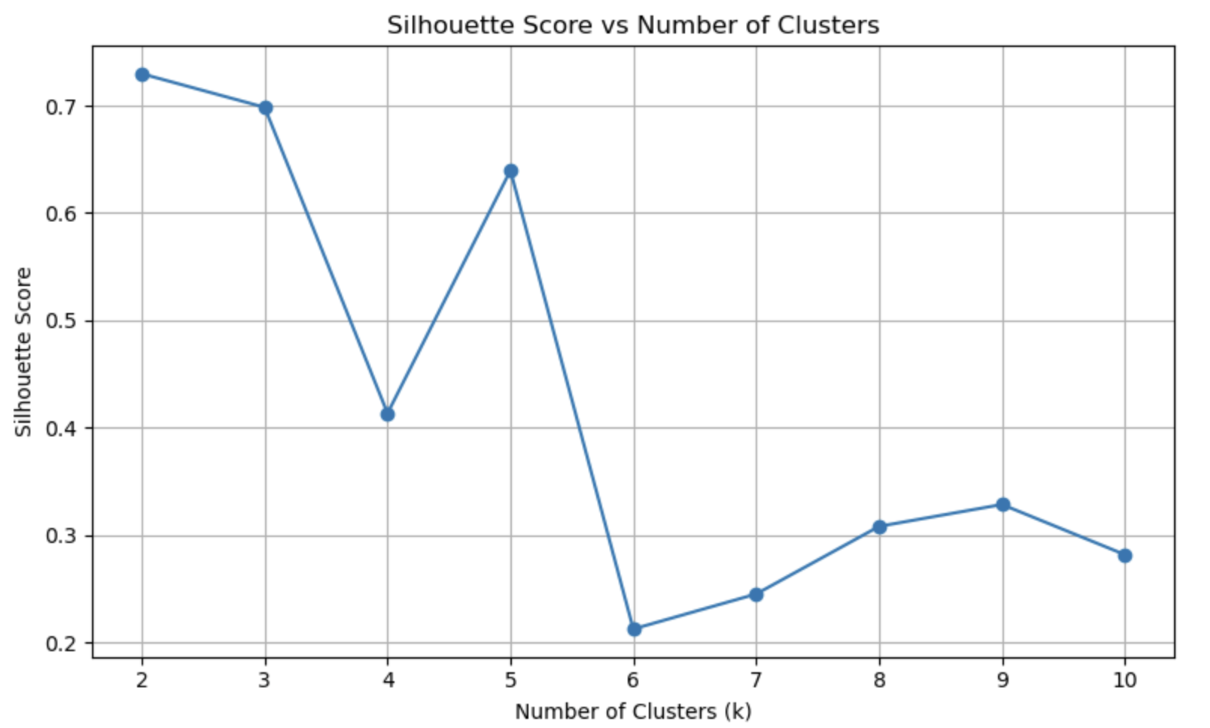

In [29]:
display(Image.open("19.png"))

                                                Figure 20: Silhouette Score vs Number of Clusters

    This curve shows us how the silhouette scores changes with number of clusters we identify 5 as the best number of clusters it also aligns with our results from the elbow method 


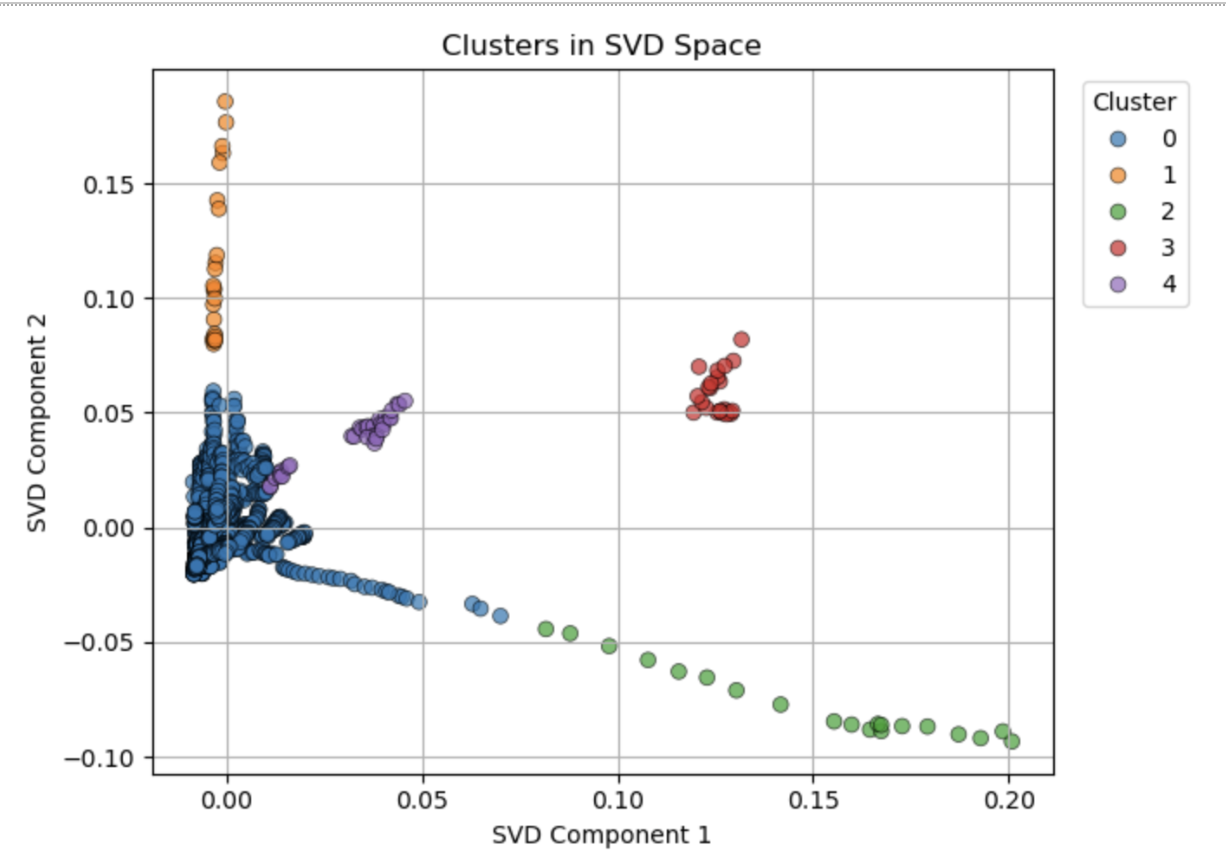

In [31]:
display(Image.open("20.png"))

                                                    Figure 21: Clusters in SVD Space 
                        
    This plot shows us how the data points are clustered using KMeans based on first and second components of the SVD as we can see some groups are separated( like red) and some are closer to each other. ( like blue and purple ). 


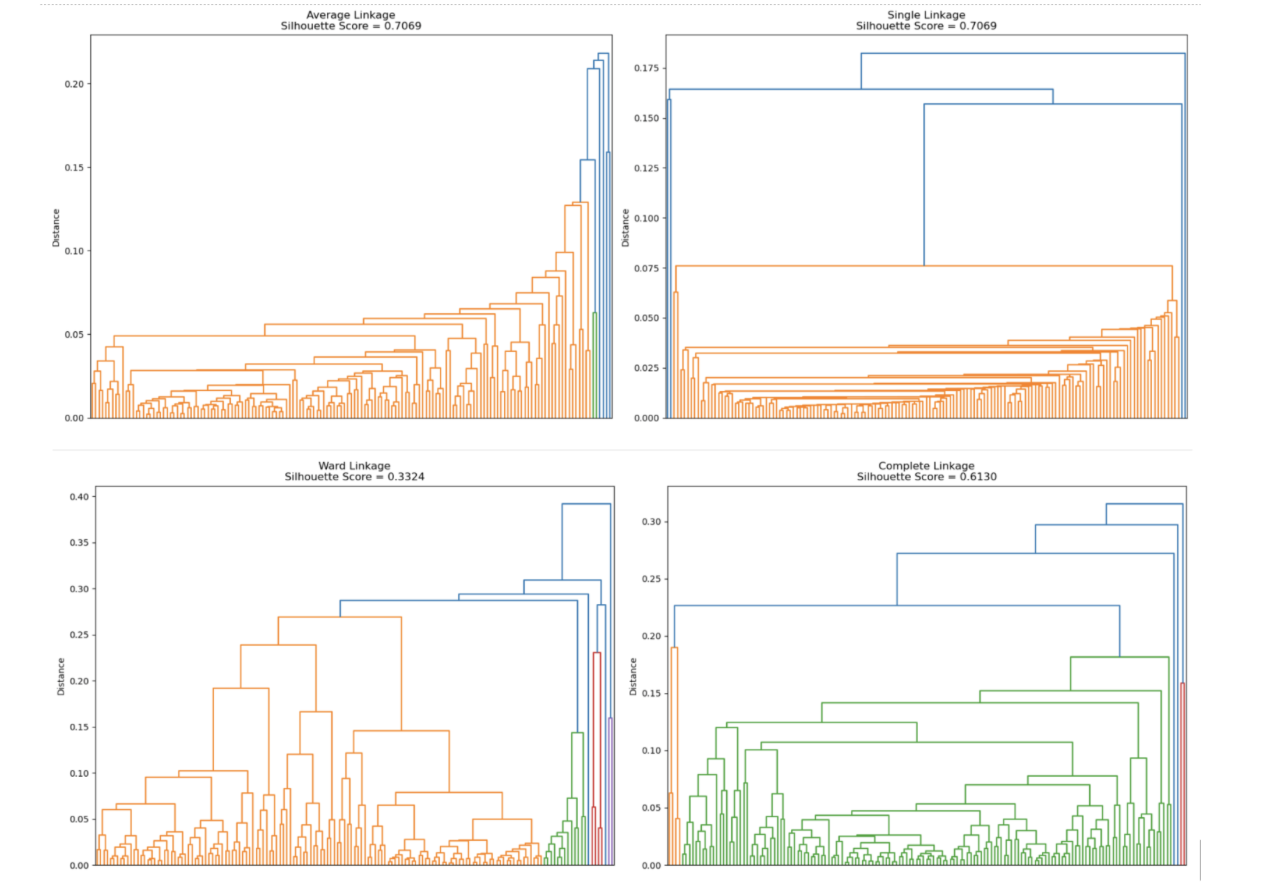

In [32]:
display(Image.open("21.png"))

                                                    Figure 22: Comparison of Linkage methods 
                    
    Average and Single linkage had the best silhouette score which suggest they had clear separation of cluster when compared to complete and ward linkage. We used a sample rate of 15 to reduce clutter and make the dendrograms readable. Average linkage was picked for the classification of the final clusters. 

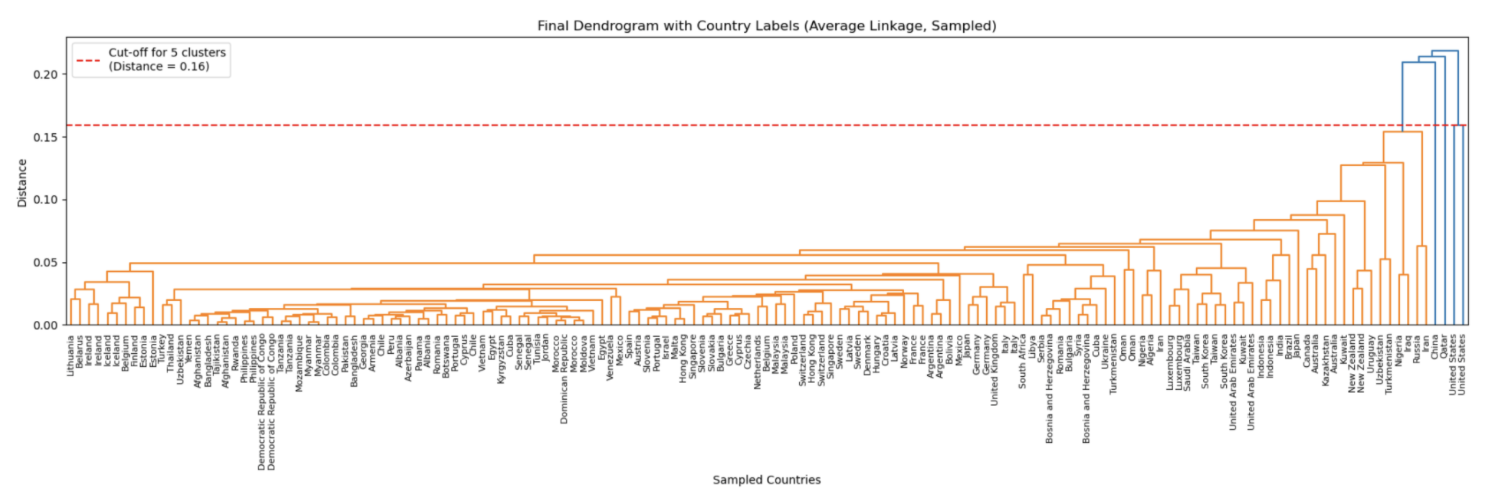

In [34]:
display(Image.open("22.png"))

                                                Figure 23: Final Dendrogram with Country Labels 
                
    The final dendrogram using average linkage was cutoff at 5 clusters and labelled country wise. Countries like Russia , the United States of America and China form a high emission cluster on the rightmost part of the dendrogram. 


 Cluster Summary with Top Countries

| **Cluster ID** | **Cluster Label**     | **Avg CO₂ Emissions (Mt)** | **Criteria**                         | **Top Countries**                 |
|----------------|------------------------|------------------------------|--------------------------------------|----------------------------------|
| 1              | High Emission          | 8198.0                       | CO₂ > 6000 Mt                        | China                            |
| 2              | Moderately High        | 5590.6                       | CO₂ between 1000 - 6000 Mt           | United States of America         |
| 3              | Medium                 | 178.8                        | CO₂ between 100 - 1000 Mt            | India, Russia, and Japan         |
| 4              | Moderately Low         | 75.2                         | CO₂ between 50 - 100 Mt              | Qatar                            |
| 5              | Low Emission           | 39.4                         | CO₂ < 50 Mt                          | Turkmenistan                     |

    This table shows us how the data points are clustered and their criteria and the top countries in that cluster. 


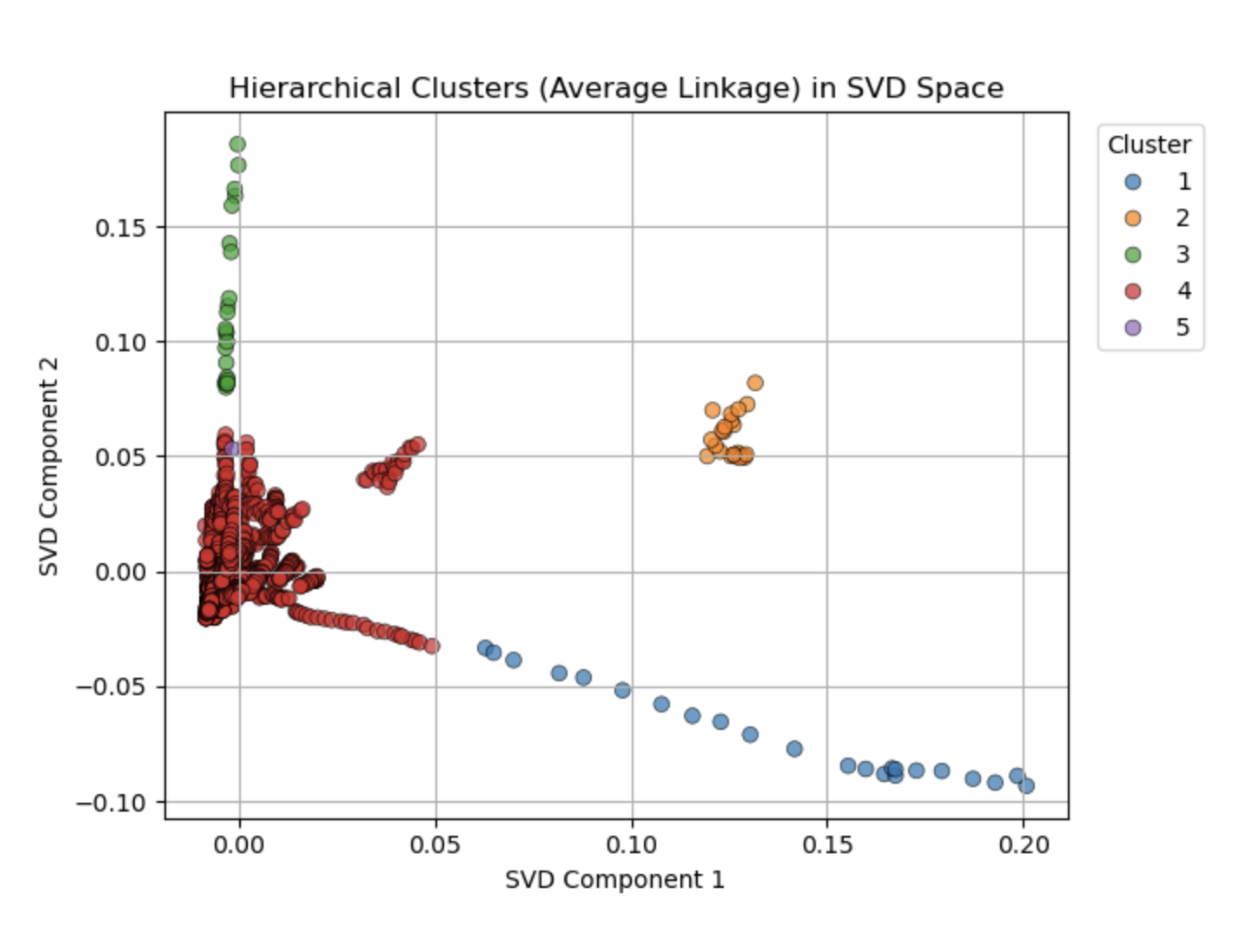

In [35]:
display(Image.open("23.png"))

                                                 Figure 24: Hierarchical Clusters in SVD Space
                
    This plot shows how the data points are clustered using hierarchical clustering based on the first and second SVD component. The cluster 4 (red) and cluster 5 (purple) overlap each other. 

Clustering Method Comparison

| **Method**           | **Optimal Clusters** | **Silhouette Score** |
|----------------------|----------------------|-----------------------|
| SVD + Kmeans         | 5                    | 0.640                 |
| SVD + Hierarchical   | 5                    | 0.703                 |

    Comparison of Silhouette scores for 5 clusters using the different methods 


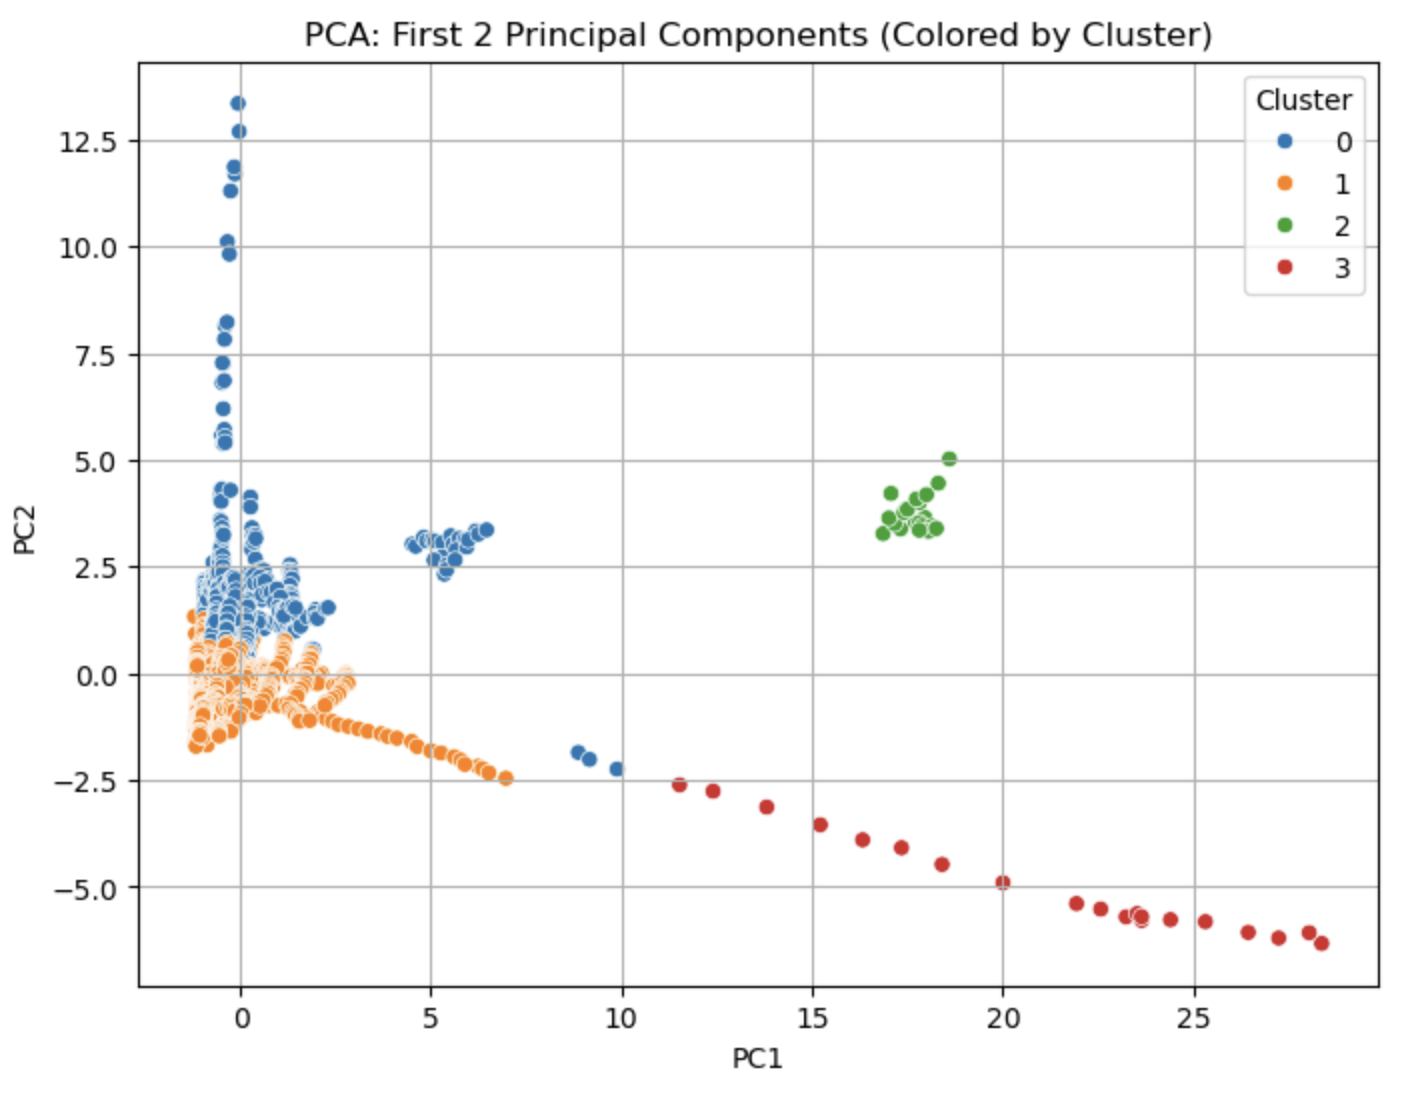

In [37]:
display(Image.open("25.png"))

                                                    Figure 25: First 2 Principal components 

    The PCA plot (PC1 vs PC2) shows clear separation between country clusters, especially along PC1 capturing major variation like GDP and emission levels.
                                               

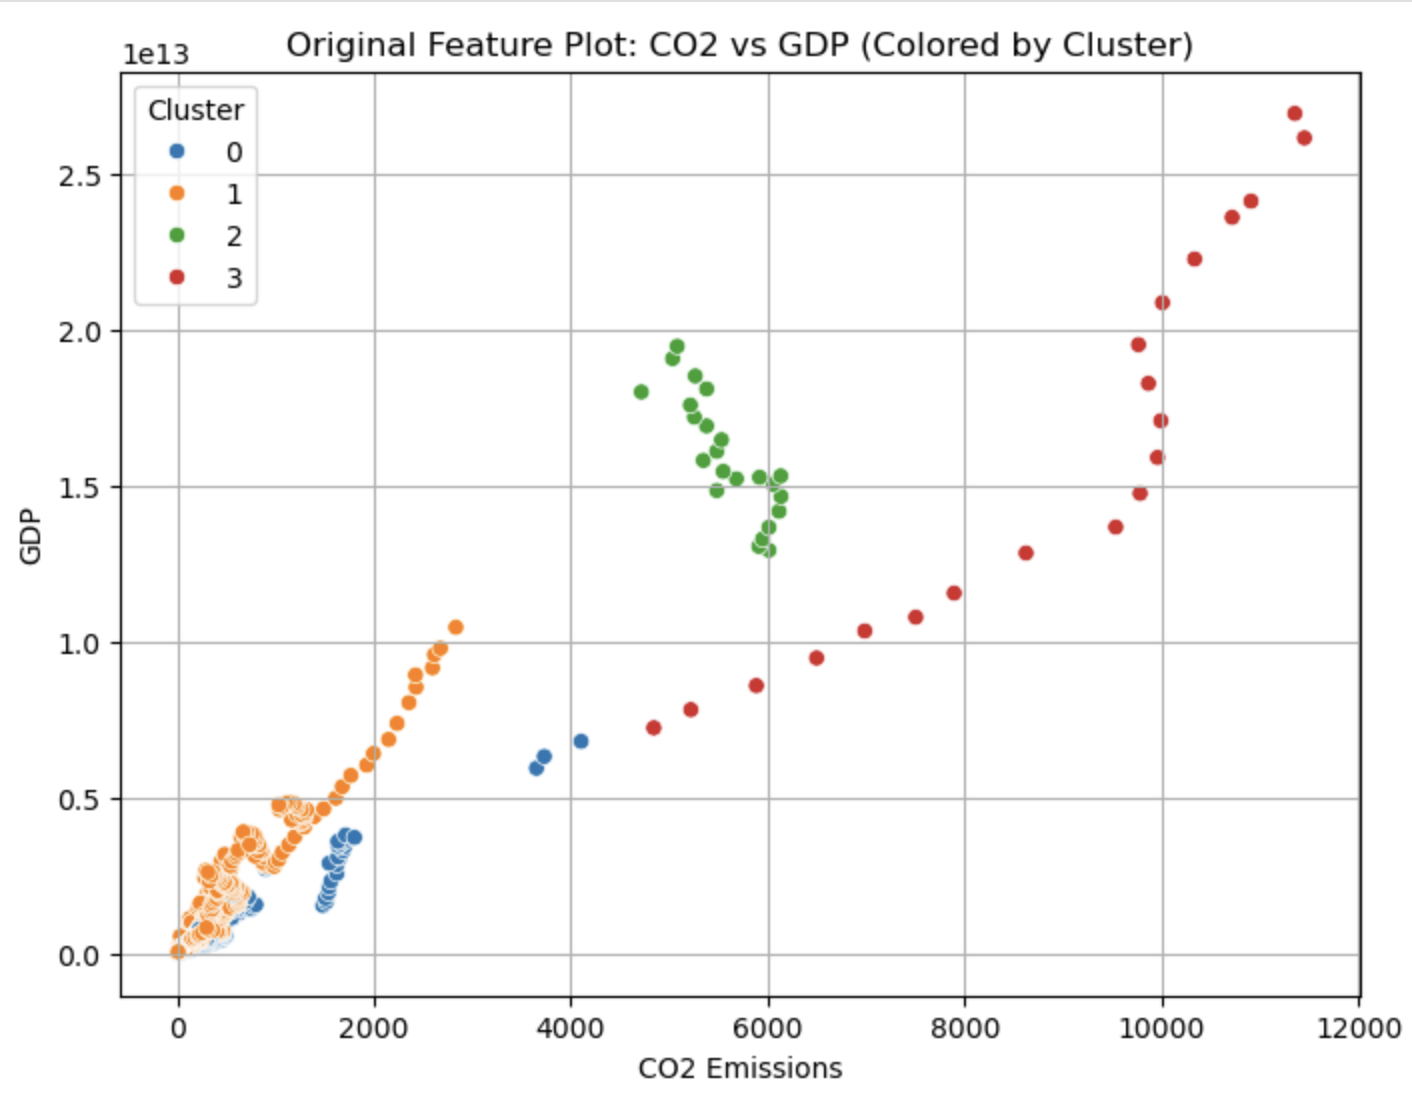

In [38]:
display(Image.open("26.png"))

                                                        Figure 26: raw CO2 vs GDP plot
                                                        
    In this plot the clusters are more spread out and less distinct, harder to tell apart visually. Raw features can be correlated or skewed, while PCA rotates the space to highlight meaningful variance. So PCA helps reveal patterns that are hidden in the original data.

     Manual Emission-Based Clustering (Average CO₂ per Country)

| **Emission Category**   | **Number of Countries** | **Example Countries**                             |
|-------------------------|--------------------------|----------------------------------------------------|
| High Emission           | 1                        | China                                              |
| Moderately High         | 4                        | India, Japan, Russia, United States                |
| Medium                  | 34                       | Algeria, Argentina, Australia, Belgium, Brazil     |
| Moderately Low          | 18                       | Austria, Bangladesh, Belarus, Chile, Qatar, Turkmenistan |
| Low                     | 51                       | Afghanistan, Albania, Armenia, Azerbaijan, Benin   |

    Based on manual clustering countries like India, Japan and Russia and classified as Moderately High. While Countries like Turkmenistan are classified as Moderately low. Our Clustering method classified India, Japan and Russia as Medium Emissions category and Turkmenistan as Low Emissions category 

## Discussion

    We implemented SVD to reduce our total number of components to 8 as it explained 98% of the variance. Most of the structure of the data was captured in the first 4-6 components. The top components captured the majority of the patterns across years and countries making it easier to do Kmeans and hierarchical clustering efficiently. 

    KMeans clustering was implemented on the top 8 components identified from SVD with a range of K (2-10). The number of clusters (K) was identified as 5 using elbow method and silhouette score of 0.640. Kmeans grouped countries based on emission patterns and can be scaled to reveal underlying patterns and structure of the data. The cluster sizes varied and one large group dominated across the years. 

    Hierarchical Clustering was implemented using the Average linkage method which had a silhouette score of 0.703, which showed better separation of clusters compared to the other linkage methods. Hierarchical clustering identified key structures within the data labelling countries like China and USA as high emission and countries like Qatar and Turkmenistan as low emission.  

    Overall SVD helped to reduce the number of features by just keeping the feature that epalined the most variance. Kmeans showed broad trends, when compared to hierarchical clustering gave clear groupings. Together they showed how countries differ across emission profiles. 


## Conclusion


    These findings help us group clusters based on emission profile and helps us develop climate policies for each cluster as it would be efficient, effective and have a real impact on the climate and our environment instead of a generalized policy that targets all the countries at once. 

    These types of clustering helps us identify the countries that perform well and that follows the policies and countrie that need stricter policy to control their emissions this also helps us create realistic policies and climate goals for the future. 



## References


1. [Original Dataset from Our World in Data (GitHub)](https://github.com/owid/co2-data)  
2. [Our World in Data](https://ourworldindata.org)  
3. [What is Unsupervised Learning? | Google Cloud](https://cloud.google.com/learn/what-is-unsupervised-learning)  
4. [What is Unsupervised Learning? | GeeksforGeeks](https://www.geeksforgeeks.org/what-is-unsupervised-learning/)  
5. [Principal Component Analysis (PCA) | GeeksforGeeks](https://www.geeksforgeeks.org/principal-component-analysis-pca/)  
6. [Singular Value Decomposition (SVD) | GeeksforGeeks](https://www.geeksforgeeks.org/singular-value-decomposition-svd/)  
7. [K-means Clustering – Introduction | GeeksforGeeks](https://www.geeksforgeeks.org/k-means-clustering-introduction/)  
8. [Hierarchical Clustering in Machine Learning | GeeksforGeeks](https://www.geeksforgeeks.org/hierarchical-clustering-in-machine-learning/)  
9. *An Introduction to Statistical Learning with Applications in R*. Springer, 2013.  
10. [Nabil, M. (2017). Random Projection – ResearchGate](https://www.researchgate.net/publication/340493681_Random_Projection)  
11. Visualization adapted from the Palmer Penguins dataset, comparing PCA results on scaled vs unscaled data.